In [ ]:
import kagglehub
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
customer_segmentation = kagglehub.dataset_download('abisheksudarshan/customer-segmentation')
print('Data source import complete.')

100%|██████████| 98.7k/98.7k [00:00<00:00, 34.5MB/s]

Extracting files...
Data source import complete.


In [ ]:
import os

# Lokasi yang lebih umum untuk mencari dataset
base_path = '/root/.cache/kagglehub/datasets/abisheksudarshan/customer-segmentation'

# Mencari semua file di dalam folder dataset
for root, dirs, files in os.walk(base_path):
    for file in files:
        print(os.path.join(root, file))  # Menampilkan jalur lengkap setiap file

/root/.cache/kagglehub/datasets/abisheksudarshan/customer-segmentation/4.complete
/root/.cache/kagglehub/datasets/abisheksudarshan/customer-segmentation/versions/4/test.csv
/root/.cache/kagglehub/datasets/abisheksudarshan/customer-segmentation/versions/4/train.csv


# Load Data

In [ ]:
# Load dataset
url = '/root/.cache/kagglehub/datasets/abisheksudarshan/customer-segmentation/versions/4/train.csv'
df = pd.read_csv(url)

In [ ]:
# Melihat jumlah masing-masing kelas di kolom Segmentation
segmentation_counts = df['Segmentation'].value_counts()

# Melihat proporsi (persentase) dari masing-masing kelas
segmentation_proportions = df['Segmentation'].value_counts(normalize=True)

print("Jumlah per segmen:")
print(segmentation_counts)
print("\nProporsi per segmen:")
print(segmentation_proportions)

Jumlah per segmen:
Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64

Proporsi per segmen:
Segmentation
D    0.281111
A    0.244422
C    0.244175
B    0.230293
Name: proportion, dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values}")
    print("-" * 50)

Column: Gender
Unique Values: ['Male' 'Female']
--------------------------------------------------
Column: Ever_Married
Unique Values: ['No' 'Yes' nan]
--------------------------------------------------
Column: Graduated
Unique Values: ['No' 'Yes' nan]
--------------------------------------------------
Column: Profession
Unique Values: ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
--------------------------------------------------
Column: Spending_Score
Unique Values: ['Low' 'Average' 'High']
--------------------------------------------------
Column: Var_1
Unique Values: ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']
--------------------------------------------------
Column: Segmentation
Unique Values: ['D' 'A' 'B' 'C']
--------------------------------------------------


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


In [ ]:
# Hapus data yang memiliki nilai null
df_clean = df.dropna()
df_clean.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


In [ ]:
df_clean.duplicated().sum()

0

In [ ]:
df_clean.describe()

,ID,Age,Work_Experience,Family_Size
count,6665.00000,6665.000000,6665.000000,6665.000000
mean,463519.84096,43.536084,2.629107,2.841110
std,2566.43174,16.524054,3.405365,1.524743
min,458982.00000,18.000000,0.000000,1.000000
25%,461349.00000,31.000000,0.000000,2.000000
50%,463575.00000,41.000000,1.000000,2.000000
75%,465741.00000,53.000000,4.000000,4.000000
max,467974.00000,89.000000,14.000000,9.000000


In [ ]:
# Hitung jumlah ideal untuk tiap segmen tanpa membulatkan
ideal_counts = {
    "D": int(0.281111 * 2000),
    "A": int(0.244422 * 2000),
    "C": int(0.244175 * 2000),
    "B": int(0.230293 * 2000),
}

# Memilih data per segmen secara manual
train_d = df_clean[df_clean['Segmentation'] == 'D'].sample(n=ideal_counts['D'], random_state=42)
train_a = df_clean[df_clean['Segmentation'] == 'A'].sample(n=ideal_counts['A'], random_state=42)
train_c = df_clean[df_clean['Segmentation'] == 'C'].sample(n=ideal_counts['C'], random_state=42)
train_b = df_clean[df_clean['Segmentation'] == 'B'].sample(n=ideal_counts['B'], random_state=42)

# Gabungkan semua data train
df = pd.concat([train_d, train_a, train_c, train_b])

# Membagi data menjadi train dan test
df_train, df_test= train_test_split(df, test_size=0.2, random_state=42)

# Menampilkan jumlah data train dan test
print(f"Jumlah data train: {len(df_train)}")
print(f"Jumlah data test: {len(df_test)}")

Jumlah data train: 1598
Jumlah data test: 400


In [ ]:
# Verifikasi proporsi di data train
train_proportions = df_train['Segmentation'].value_counts(normalize=True)
print("\nProporsi di data train:")
print(train_proportions)

# Verifikasi jika ada nilai null di data train
print("\nApakah ada nilai null di data train?")
print(df_train.isnull().sum())


Proporsi di data train:
Segmentation
D    0.276596
C    0.250313
A    0.246558
B    0.226533
Name: proportion, dtype: float64

Apakah ada nilai null di data train?
ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


# Exploratory Data Analysis

In [ ]:
df_train.describe()

,ID,Age,Work_Experience,Family_Size
count,1598.000000,1598.000000,1598.000000,1598.000000
mean,463511.578849,42.828536,2.640801,2.853567
std,2555.146072,16.436116,3.418779,1.504686
min,458984.000000,18.000000,0.000000,1.000000
25%,461338.500000,30.000000,0.000000,2.000000
50%,463591.000000,40.000000,1.000000,3.000000
75%,465720.750000,53.000000,4.000000,4.000000
max,467972.000000,89.000000,14.000000,9.000000


## Numeric

<ipython-input-17-4196d746e7ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segmentation', data=df_train, palette='pastel')


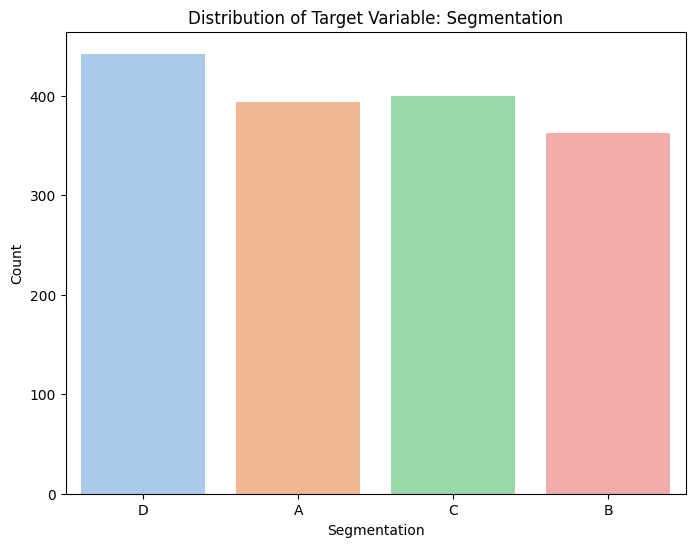

In [ ]:
# 1. Distribution of target variable 'Segmentation'
plt.figure(figsize=(8, 6))
sns.countplot(x='Segmentation', data=df_train, palette='pastel')
plt.title('Distribution of Target Variable: Segmentation')
plt.xlabel('Segmentation')
plt.ylabel('Count')
plt.show()

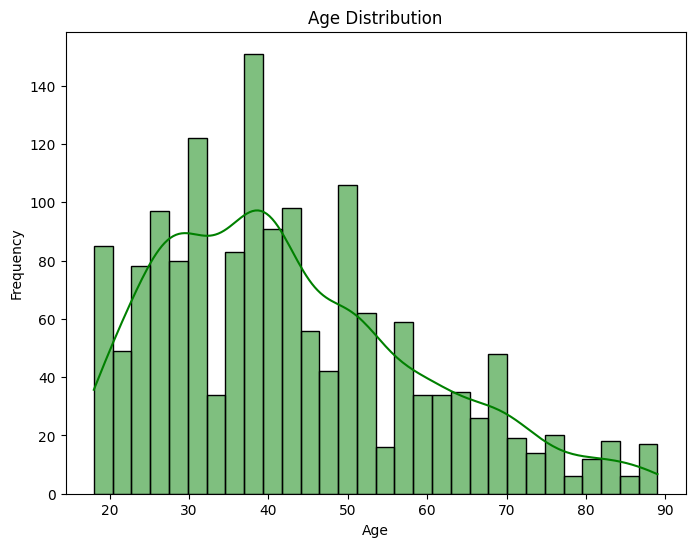

In [ ]:
# 3. Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df_train['Age'], kde=True, bins=30, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-19-4ea10f288b0f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segmentation', y='Age', data=df_train, palette='Set3')


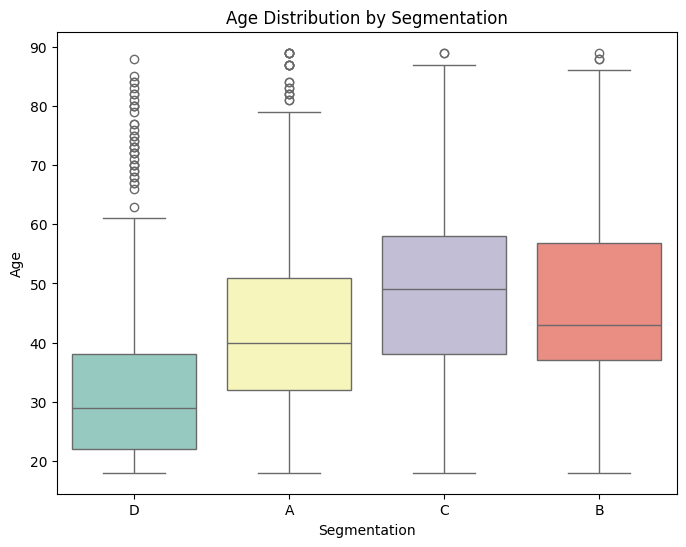

In [ ]:
# 7. Boxplot of Age by Segmentation
plt.figure(figsize=(8, 6))
sns.boxplot(x='Segmentation', y='Age', data=df_train, palette='Set3')
plt.title('Age Distribution by Segmentation')
plt.xlabel('Segmentation')
plt.ylabel('Age')
plt.show()

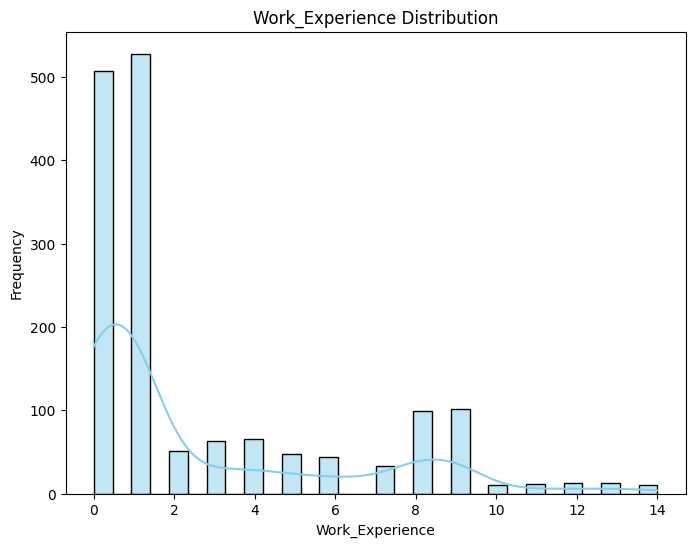

In [ ]:
# 3. Distribution of Work_Experience
plt.figure(figsize=(8, 6))
sns.histplot(df_train['Work_Experience'], kde=True, bins=30, color='skyblue')
plt.title('Work_Experience Distribution')
plt.xlabel('Work_Experience')
plt.ylabel('Frequency')
plt.show()

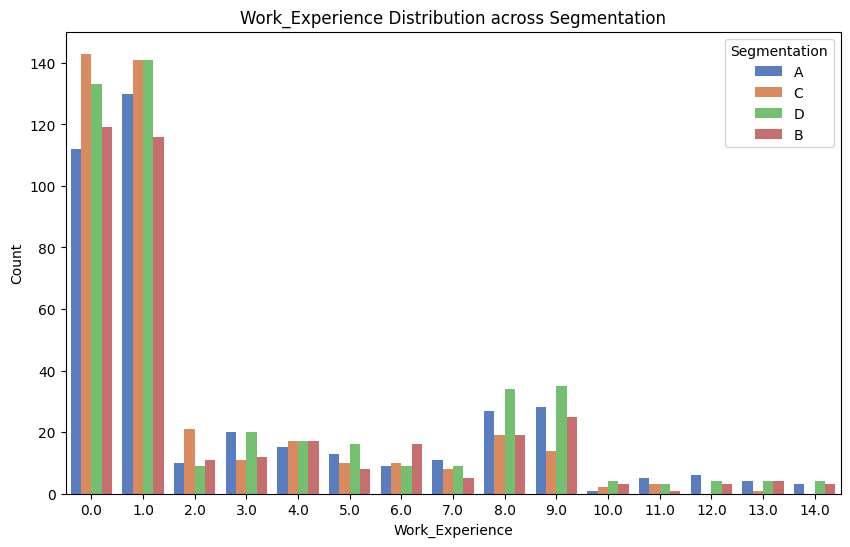

In [ ]:
# 2. Distribution of Work_Experience vs Segmentation
plt.figure(figsize=(10, 6))
sns.countplot(x='Work_Experience', data=df_train, palette='muted', hue='Segmentation')
plt.title('Work_Experience Distribution across Segmentation')
plt.xlabel('Work_Experience')
plt.ylabel('Count')
plt.legend(title='Segmentation')
plt.show()

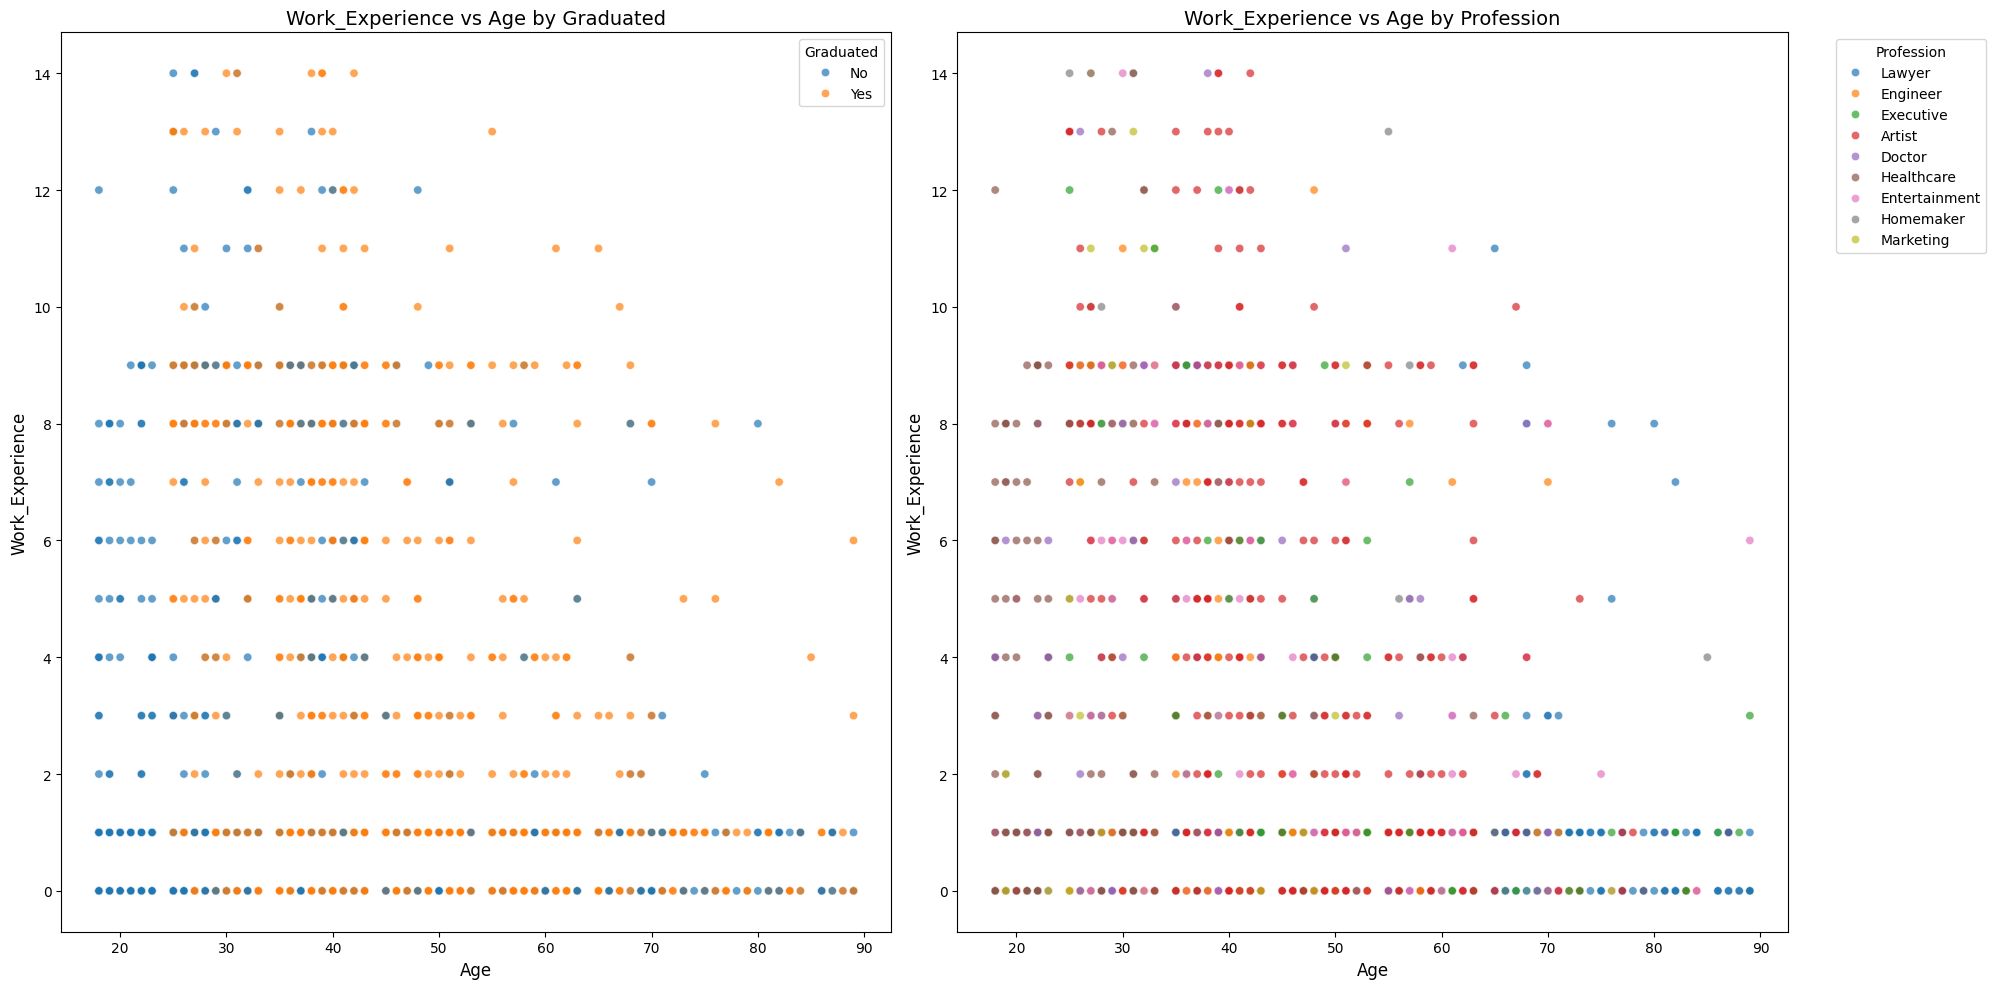

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot pertama: Age vs Work_Experience by Graduated
sns.scatterplot(x='Age', y='Work_Experience', hue='Graduated', data=df_train, alpha=0.7, ax=axes[0])
axes[0].set_title('Work_Experience vs Age by Graduated', fontsize=14)
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Work_Experience', fontsize=12)
axes[0].legend(title='Graduated')

# Plot kedua: Age vs Work_Experience by Profession
sns.scatterplot(x='Age', y='Work_Experience', hue='Profession', data=df_train, alpha=0.7, ax=axes[1], palette='tab10')
axes[1].set_title('Work_Experience vs Age by Profession', fontsize=14)
axes[1].set_xlabel('Age', fontsize=12)
axes[1].set_ylabel('Work_Experience', fontsize=12)
axes[1].legend(title='Profession', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menambahkan sedikit spasi di antara plot
plt.tight_layout()
plt.show()

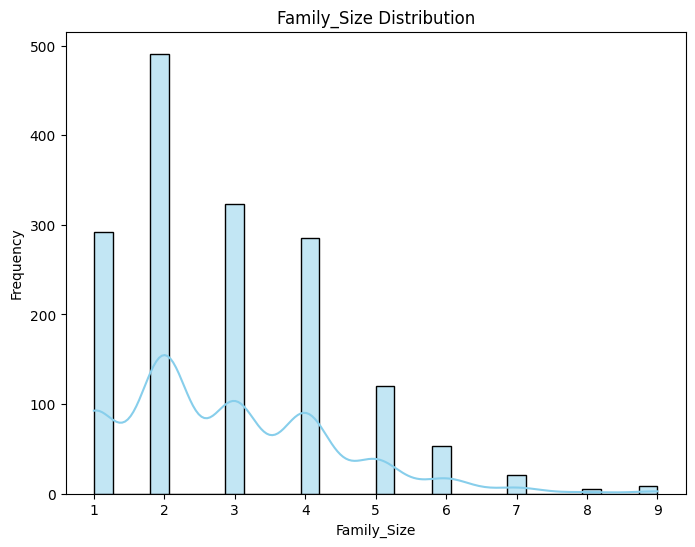

In [ ]:
# 3. Distribution of Family_Size
plt.figure(figsize=(8, 6))
sns.histplot(df_train['Family_Size'], kde=True, bins=30, color='skyblue')
plt.title('Family_Size Distribution')
plt.xlabel('Family_Size')
plt.ylabel('Frequency')
plt.show()

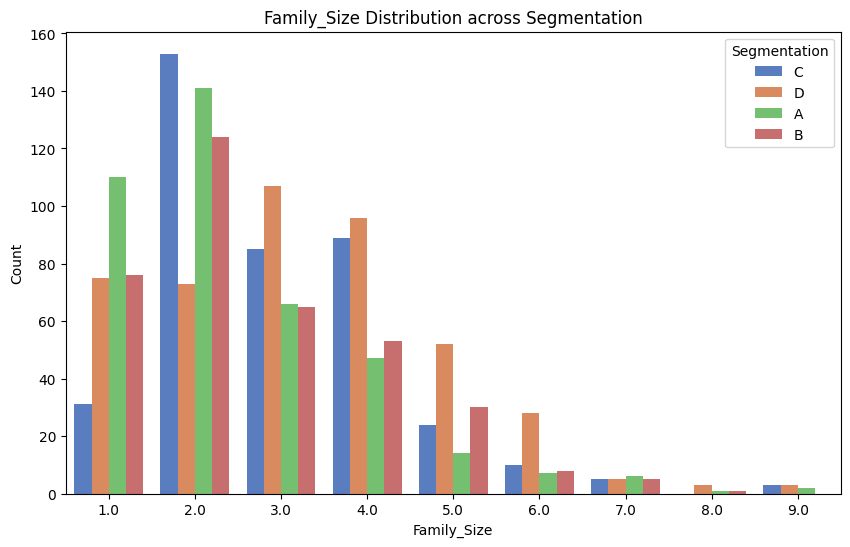

In [ ]:
# 2. Distribution of Family_Size vs Segmentation
plt.figure(figsize=(10, 6))
sns.countplot(x='Family_Size', data=df_train, palette='muted', hue='Segmentation')
plt.title('Family_Size Distribution across Segmentation')
plt.xlabel('Family_Size')
plt.ylabel('Count')
plt.legend(title='Segmentation')
plt.show()

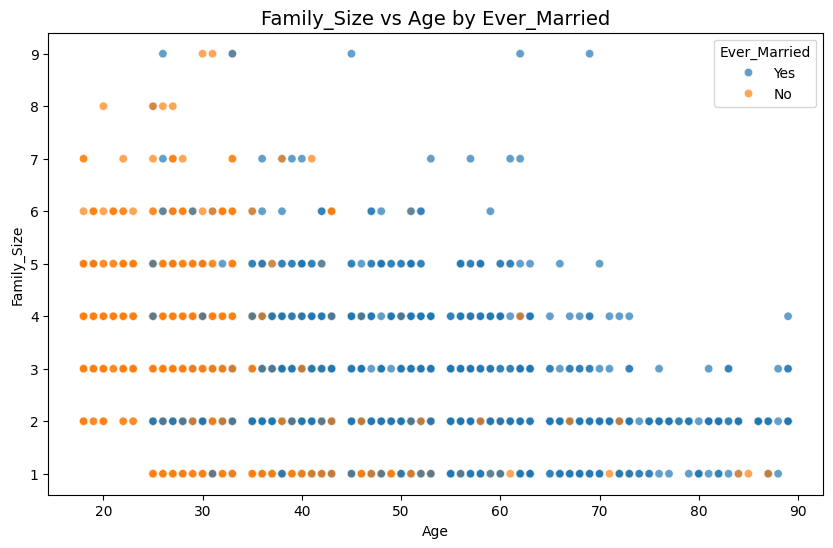

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Family_Size', hue='Ever_Married', data=df_train, alpha=0.7)
plt.title('Family_Size vs Age by Ever_Married', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Family_Size')
plt.legend(title='Ever_Married')
plt.show()

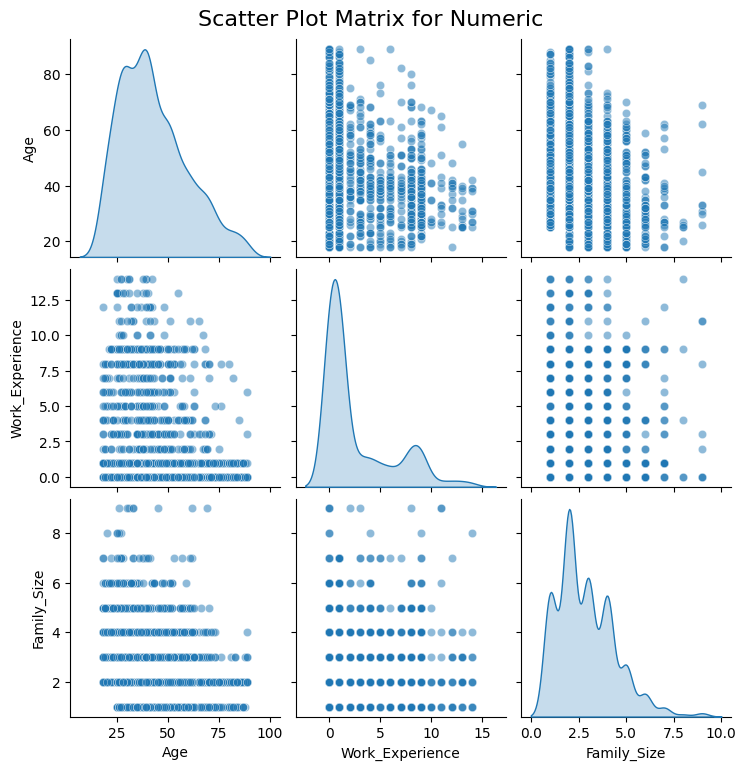

In [ ]:
sns.pairplot(df_train[['Age', 'Work_Experience', 'Family_Size']], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Scatter Plot Matrix for Numeric', y=1.02, fontsize=16)
plt.show()

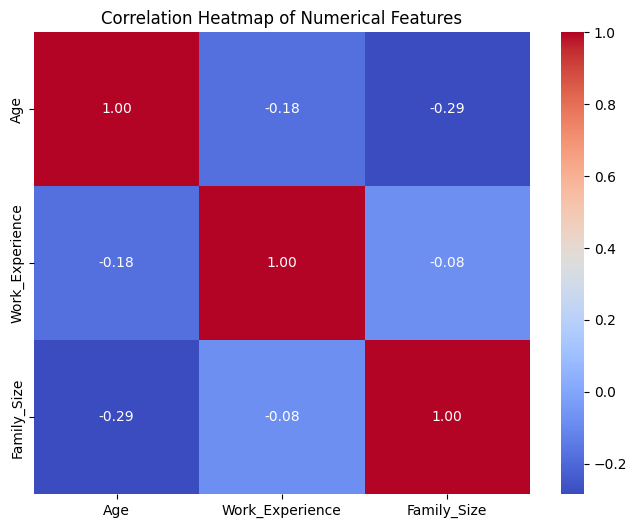

In [ ]:
# 6. Correlation heatmap (numerical data only)
corr = df_train[['Age', 'Work_Experience', 'Family_Size']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Categorical

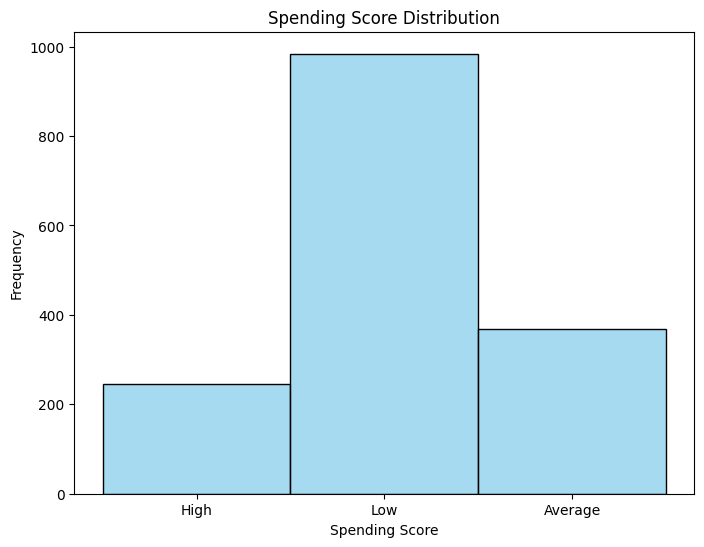

In [ ]:
# 3. Distribution of Spending Score
plt.figure(figsize=(8, 6))
sns.histplot(df_train['Spending_Score'], bins=30, color='skyblue')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

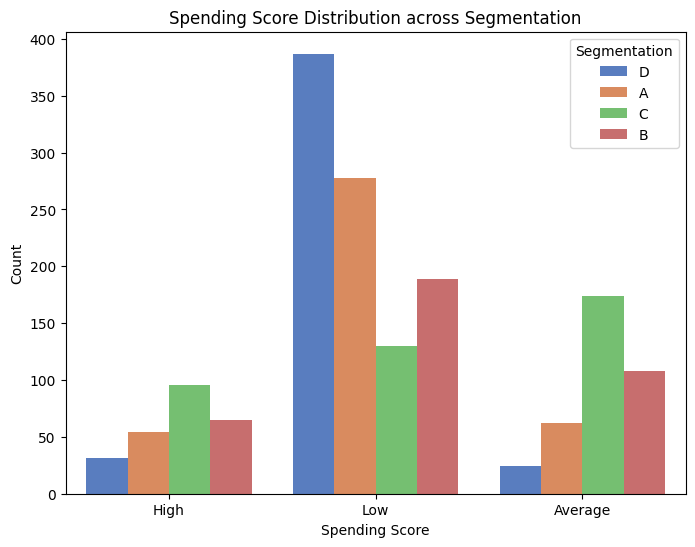

In [ ]:
# 5. Spending Score vs Segmentation
plt.figure(figsize=(8, 6))
sns.countplot(x='Spending_Score', data=df_train, palette='muted', hue='Segmentation')
plt.title('Spending Score Distribution across Segmentation')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.legend(title='Segmentation')
plt.show()

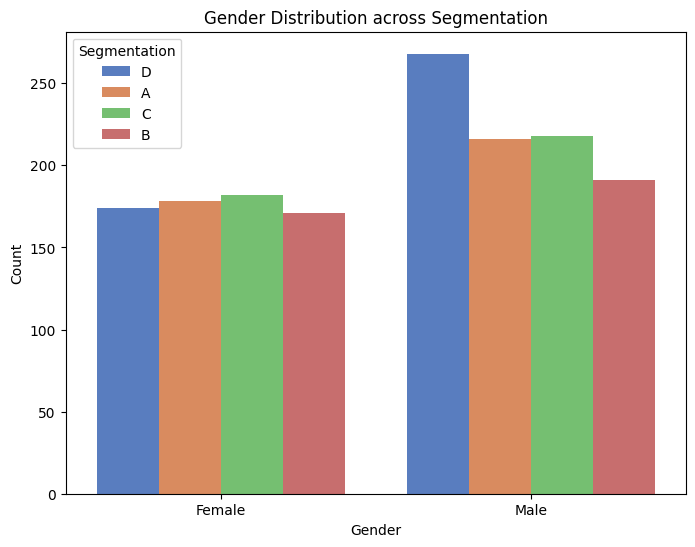

In [ ]:
# 2. Distribution of Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df_train, palette='muted', hue='Segmentation')
plt.title('Gender Distribution across Segmentation')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Segmentation')
plt.show()

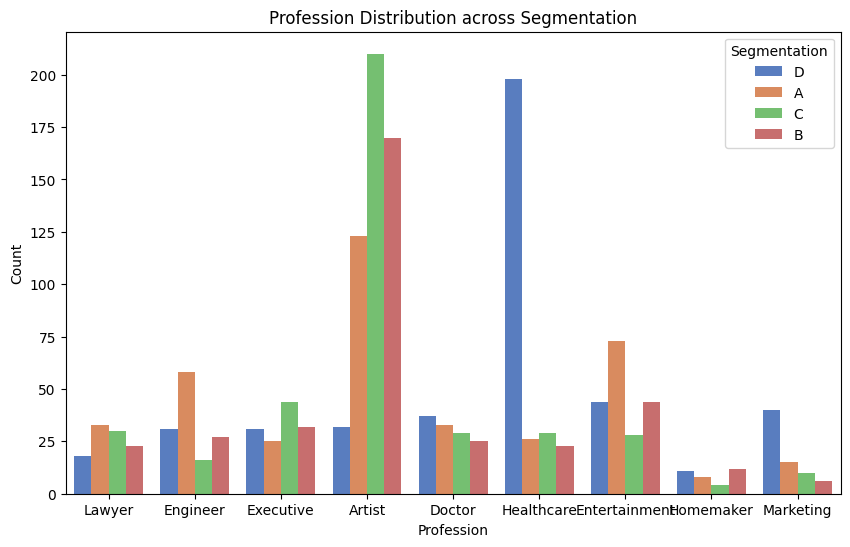

In [ ]:
# 2. Distribution of Profession
plt.figure(figsize=(10, 6))
sns.countplot(x='Profession', data=df_train, palette='muted', hue='Segmentation')
plt.title('Profession Distribution across Segmentation')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.legend(title='Segmentation')
plt.show()

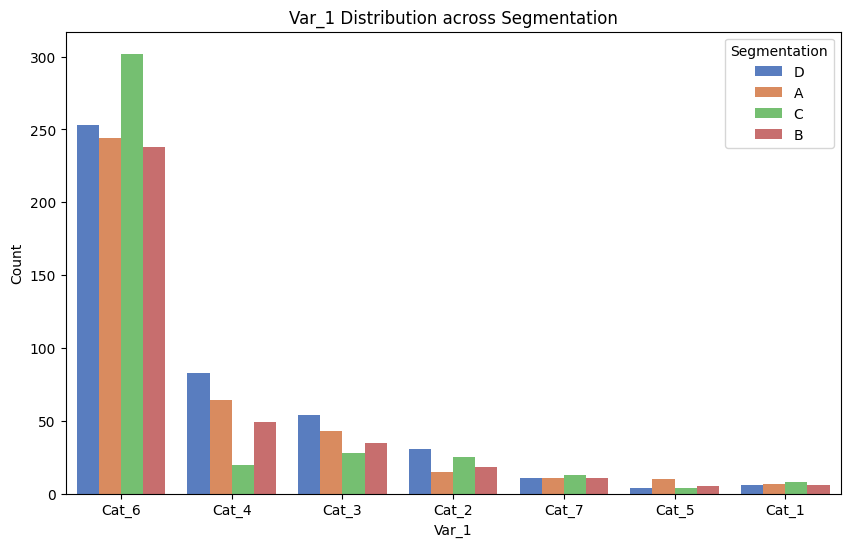

In [ ]:
# 2. Distribution of Var_1
plt.figure(figsize=(10, 6))
sns.countplot(x='Var_1', data=df_train, palette='muted', hue='Segmentation')
plt.title('Var_1 Distribution across Segmentation')
plt.xlabel('Var_1')
plt.ylabel('Count')
plt.legend(title='Segmentation')
plt.show()

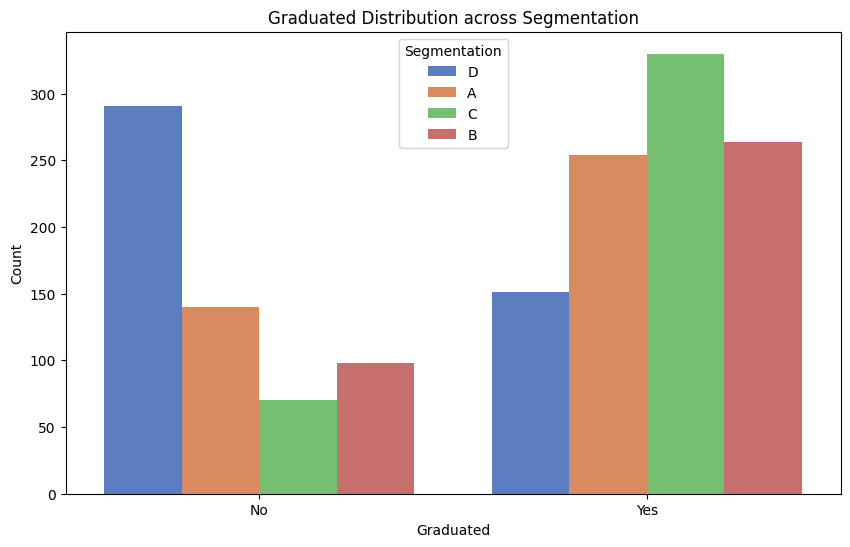

In [ ]:
# 2. Distribution of Graduated
plt.figure(figsize=(10, 6))
sns.countplot(x='Graduated', data=df_train, palette='muted', hue='Segmentation')
plt.title('Graduated Distribution across Segmentation')
plt.xlabel('Graduated')
plt.ylabel('Count')
plt.legend(title='Segmentation')
plt.show()

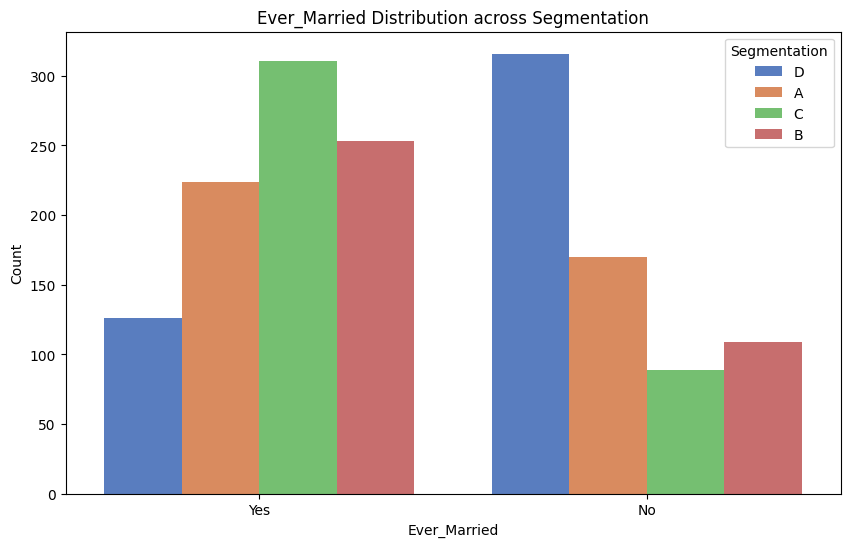

In [ ]:
# 2. Distribution of Ever_Married
plt.figure(figsize=(10, 6))
sns.countplot(x='Ever_Married', data=df_train, palette='muted', hue='Segmentation')
plt.title('Ever_Married Distribution across Segmentation')
plt.xlabel('Ever_Married')
plt.ylabel('Count')
plt.legend(title='Segmentation')
plt.show()

In [ ]:
# Calculate skewness for Family_Size and Work_Experience
family_size_skewness = df_train['Family_Size'].skew(skipna=True)
work_experience_skewness = df_train['Work_Experience'].skew(skipna=True)

print("Skewness of Family_Size:", family_size_skewness)
print("Skewness of Work_Experience:", work_experience_skewness)

Skewness of Family_Size: 0.9458330775262743
Skewness of Work_Experience: 1.3451796995334782


## df_train

In [ ]:
df_train['Work_Experience'] = df_train.groupby(['Age', 'Graduated', 'Profession'])['Work_Experience'].transform(lambda x: x.fillna(x.median()))
df_train['Work_Experience'].fillna(df_train['Work_Experience'].median(), inplace=True)

<ipython-input-36-a1e918d1e0ae>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Work_Experience'].fillna(df_train['Work_Experience'].median(), inplace=True)


In [ ]:
df_train['Family_Size'] = df_train.groupby(['Age', 'Ever_Married'])['Family_Size'].transform(lambda x: x.fillna(x.median()))
df_train['Family_Size'].fillna(df_train['Family_Size'].mean(), inplace=True)

<ipython-input-37-889a53ddde1d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Family_Size'].fillna(df_train['Family_Size'].mean(), inplace=True)


In [ ]:
df_train['Ever_Married'].fillna(df_train['Ever_Married'].mode()[0], inplace=True)

<ipython-input-38-be30668386f8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Ever_Married'].fillna(df_train['Ever_Married'].mode()[0], inplace=True)


In [ ]:
df_train['Graduated'].fillna(df_train['Graduated'].mode()[0], inplace=True)

<ipython-input-39-b6e84d271b5a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Graduated'].fillna(df_train['Graduated'].mode()[0], inplace=True)


In [ ]:
df_train['Profession'].fillna('Other', inplace=True)

<ipython-input-40-e1221fab6cb3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Profession'].fillna('Other', inplace=True)


In [ ]:
df_train['Var_1'] = df_train.groupby(['Gender', 'Ever_Married', 'Age', 'Graduated','Profession','Work_Experience', 'Spending_Score','Family_Size'])['Var_1'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_train['Var_1'].mode()[0]))

In [ ]:
df_train.isnull().any()

,0
ID,False
Gender,False
Ever_Married,False
Age,False
Graduated,False
Profession,False
Work_Experience,False
Spending_Score,False
Family_Size,False
Var_1,False


In [ ]:
df_train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
3270,467262,Female,Yes,77,No,Lawyer,1.0,High,2.0,Cat_6,D
1693,465821,Female,No,28,No,Engineer,3.0,Low,7.0,Cat_4,A
7692,462486,Male,Yes,51,Yes,Executive,1.0,Average,5.0,Cat_6,C
1779,466184,Female,No,35,Yes,Artist,3.0,Low,1.0,Cat_6,C
2226,462020,Female,No,25,Yes,Artist,13.0,Low,2.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
6328,460370,Female,Yes,28,Yes,Executive,8.0,High,2.0,Cat_6,C
4203,464074,Female,Yes,39,Yes,Doctor,0.0,Average,3.0,Cat_6,C
2510,467605,Female,Yes,40,Yes,Engineer,1.0,Average,7.0,Cat_6,A
5009,467823,Male,Yes,45,Yes,Doctor,6.0,Average,2.0,Cat_6,C


## df_test

In [ ]:
df_test['Work_Experience'] = df_test.groupby(['Age', 'Graduated', 'Profession'])['Work_Experience'].transform(lambda x: x.fillna(x.median()))
df_test['Work_Experience'].fillna(df_test['Work_Experience'].median(), inplace=True)

<ipython-input-44-eea91f2ee303>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Work_Experience'].fillna(df_test['Work_Experience'].median(), inplace=True)


In [ ]:
df_test['Family_Size'] = df_test.groupby(['Age', 'Ever_Married'])['Family_Size'].transform(lambda x: x.fillna(x.median()))
df_test['Family_Size'].fillna(df_test['Family_Size'].mean(), inplace=True)

<ipython-input-45-6c3061a364d5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Family_Size'].fillna(df_test['Family_Size'].mean(), inplace=True)


In [ ]:
df_test['Ever_Married'].fillna(df_test['Ever_Married'].mode()[0], inplace=True)

<ipython-input-46-c49e2c6af9fa>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Ever_Married'].fillna(df_test['Ever_Married'].mode()[0], inplace=True)


In [ ]:
df_test['Graduated'].fillna(df_test['Graduated'].mode()[0], inplace=True)

<ipython-input-47-73dfd78ec1c3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Graduated'].fillna(df_test['Graduated'].mode()[0], inplace=True)


In [ ]:
df_test['Profession'].fillna('Other', inplace=True)

<ipython-input-48-601fb3b7c707>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Profession'].fillna('Other', inplace=True)


In [ ]:
df_test['Var_1'] = df_test.groupby(['Gender', 'Ever_Married', 'Age', 'Graduated','Profession','Work_Experience', 'Spending_Score','Family_Size'])['Var_1'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_test['Var_1'].mode()[0]))

In [ ]:
df_test.isnull().any()

,0
ID,False
Gender,False
Ever_Married,False
Age,False
Graduated,False
Profession,False
Work_Experience,False
Spending_Score,False
Family_Size,False
Var_1,False


In [ ]:
df_test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
3700,467214,Male,No,26,No,Engineer,0.0,Low,4.0,Cat_3,D
908,462081,Male,No,22,No,Marketing,0.0,Low,3.0,Cat_4,D
6867,461151,Male,No,32,Yes,Artist,0.0,Low,3.0,Cat_3,D
1372,465897,Female,Yes,42,Yes,Artist,9.0,Low,1.0,Cat_6,A
3323,462782,Male,Yes,57,Yes,Executive,7.0,High,2.0,Cat_4,C
...,...,...,...,...,...,...,...,...,...,...,...
7251,464819,Female,Yes,67,Yes,Lawyer,1.0,Low,1.0,Cat_4,A
2987,460348,Female,No,37,Yes,Artist,1.0,Low,2.0,Cat_6,C
5973,467855,Male,Yes,31,Yes,Engineer,1.0,Low,2.0,Cat_6,D
6890,461295,Female,Yes,66,Yes,Artist,1.0,Average,3.0,Cat_6,C


# Feature Enginering & Scaling

## Encoding Feature

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_encoded = df_train.drop(columns=['ID'])
df_test_encoded = df_test.drop(columns=['ID'])

# categorical df_train
df_encoded = pd.get_dummies(df_encoded,prefix='Gender',columns=['Gender'],drop_first=True)
df_encoded = pd.get_dummies(df_encoded,prefix='Ever_Married',columns=['Ever_Married'],drop_first=True)
df_encoded = pd.get_dummies(df_encoded,prefix='Graduated',columns=['Graduated'],drop_first=True)
df_encoded.loc[df_encoded['Spending_Score']=='Low','Spending_Score']=1
df_encoded.loc[df_encoded['Spending_Score']=='Average','Spending_Score']=2
df_encoded.loc[df_encoded['Spending_Score']=='High','Spending_Score']=3
df_encoded['Spending_Score']=df_encoded['Spending_Score'].astype('int')
df_encoded['Var_1']=df_encoded['Var_1'].apply(lambda x:x[-1])
df_encoded['Var_1']=df_encoded['Var_1'].astype('int')
df_encoded = pd.get_dummies(df_encoded, columns=['Profession'])
# df_encoded['Profession'] = le.fit_transform(df_encoded['Profession'])


# categorical df_test
df_test_encoded = pd.get_dummies(df_test_encoded,prefix='Gender',columns=['Gender'],drop_first=True)
df_test_encoded = pd.get_dummies(df_test_encoded,prefix='Ever_Married',columns=['Ever_Married'],drop_first=True)
df_test_encoded = pd.get_dummies(df_test_encoded,prefix='Graduated',columns=['Graduated'],drop_first=True)
df_test_encoded.loc[df_test_encoded['Spending_Score']=='Low','Spending_Score']=1
df_test_encoded.loc[df_test_encoded['Spending_Score']=='Average','Spending_Score']=2
df_test_encoded.loc[df_test_encoded['Spending_Score']=='High','Spending_Score']=3
df_test_encoded['Spending_Score']=df_test_encoded['Spending_Score'].astype('int')
df_test_encoded['Var_1']=df_test_encoded['Var_1'].apply(lambda x:x[-1])
df_test_encoded['Var_1']=df_test_encoded['Var_1'].astype('int')
df_test_encoded = pd.get_dummies(df_test_encoded, columns=['Profession'])
# df_test_encoded['Profession'] = le.fit_transform(df_test_encoded['Profession'])

In [ ]:
# Segmentation df_train
df_encoded.loc[df_encoded['Segmentation']=='A', 'Segmentation']= 0
df_encoded.loc[df_encoded['Segmentation']=='B', 'Segmentation']= 1
df_encoded.loc[df_encoded['Segmentation']=='C', 'Segmentation']= 2
df_encoded.loc[df_encoded['Segmentation']=='D', 'Segmentation']= 3
df_encoded['Segmentation']= df_encoded['Segmentation'].astype('int')

Segmentation = df_encoded.pop('Segmentation')
df_encoded['Segmentation'] = Segmentation
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1598 entries, 3270 to 1243
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1598 non-null   int64  
 1   Work_Experience           1598 non-null   float64
 2   Spending_Score            1598 non-null   int64  
 3   Family_Size               1598 non-null   float64
 4   Var_1                     1598 non-null   int64  
 5   Gender_Male               1598 non-null   bool   
 6   Ever_Married_Yes          1598 non-null   bool   
 7   Graduated_Yes             1598 non-null   bool   
 8   Profession_Artist         1598 non-null   bool   
 9   Profession_Doctor         1598 non-null   bool   
 10  Profession_Engineer       1598 non-null   bool   
 11  Profession_Entertainment  1598 non-null   bool   
 12  Profession_Executive      1598 non-null   bool   
 13  Profession_Healthcare     1598 non-null   bool   
 14  Profession

In [ ]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 3700 to 5233
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       400 non-null    int64  
 1   Work_Experience           400 non-null    float64
 2   Spending_Score            400 non-null    int64  
 3   Family_Size               400 non-null    float64
 4   Var_1                     400 non-null    int64  
 5   Segmentation              400 non-null    object 
 6   Gender_Male               400 non-null    bool   
 7   Ever_Married_Yes          400 non-null    bool   
 8   Graduated_Yes             400 non-null    bool   
 9   Profession_Artist         400 non-null    bool   
 10  Profession_Doctor         400 non-null    bool   
 11  Profession_Engineer       400 non-null    bool   
 12  Profession_Entertainment  400 non-null    bool   
 13  Profession_Executive      400 non-null    bool   
 14  Profession_

In [ ]:
# Menambah fitur rasio
df_encoded['Age_Work_Experience_Ratio'] = df_encoded['Age'] / (df_encoded['Work_Experience'] + 1)  # +1 untuk menghindari pembagian dengan nol
df_encoded['Family_Size_Age_Ratio'] = df_encoded['Family_Size'] / (df_encoded['Age'] + 1)
df_test_encoded['Age_Work_Experience_Ratio'] = df_test_encoded['Age'] / (df_test_encoded['Work_Experience'] + 1)
df_test_encoded['Family_Size_Age_Ratio'] = df_test_encoded['Family_Size'] / (df_test_encoded['Age'] + 1)

# Menambah fitur interaksi
df_encoded['Age_Spending_Interaction'] = df_encoded['Age'] * df_encoded['Spending_Score']
df_test_encoded['Age_Spending_Interaction'] = df_test_encoded['Age'] * df_test_encoded['Spending_Score']

## Scaling

In [ ]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols_to_scale = ['Age', 'Work_Experience', 'Family_Size', 'Age_Work_Experience_Ratio', 'Family_Size_Age_Ratio', 'Age_Spending_Interaction', 'Spending_Score', 'Var_1']
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])
df_test_encoded[cols_to_scale] = scaler.fit_transform(df_test_encoded[cols_to_scale])

In [ ]:
df_encoded.head()

,Age,Work_Experience,Spending_Score,Family_Size,Var_1,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Artist,Profession_Doctor,...,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Segmentation,Age_Work_Experience_Ratio,Family_Size_Age_Ratio,Age_Spending_Interaction
3270,0.830986,0.071429,1.0,0.125,0.833333,False,True,False,False,False,...,False,False,False,False,True,False,3,0.423617,0.038962,0.855422
1693,0.140845,0.214286,0.0,0.750,0.500000,False,False,False,False,False,...,False,False,False,False,False,False,0,0.064091,0.622486,0.040161
7692,0.464789,0.071429,0.5,0.500,0.833333,True,True,True,False,False,...,False,True,False,False,False,False,2,0.275241,0.229684,0.337349
1779,0.239437,0.214286,0.0,0.000,0.833333,False,False,True,True,False,...,False,False,False,False,False,False,2,0.084065,0.044742,0.068273
2226,0.098592,0.928571,0.0,0.125,0.833333,False,False,True,True,False,...,False,False,False,False,False,False,2,0.004578,0.177669,0.028112


In [ ]:
df_test_encoded.head()

,Age,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Artist,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Age_Work_Experience_Ratio,Family_Size_Age_Ratio,Age_Spending_Interaction
3700,0.114286,0.000000,0.0,0.375,0.333333,D,True,False,False,False,...,True,False,False,False,False,False,False,0.284419,0.446047,0.032520
908,0.057143,0.000000,0.0,0.250,0.500000,D,True,False,False,False,...,False,False,False,False,False,False,True,0.238252,0.388338,0.016260
6867,0.200000,0.000000,0.0,0.250,0.333333,D,True,False,True,True,...,False,False,False,False,False,False,False,0.353669,0.259567,0.056911
1372,0.342857,0.642857,0.0,0.000,0.833333,A,False,True,True,True,...,False,False,False,False,False,False,False,0.032811,0.039160,0.097561
3323,0.557143,0.500000,1.0,0.125,0.500000,C,True,True,True,False,...,False,False,True,False,False,False,False,0.066570,0.075736,0.621951


# Modeling

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(columns=['Segmentation']), df_encoded['Segmentation'], test_size=0.2, random_state=42)
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (1278, 20)
y_train (1278,)
X_test (320, 20)
y_test (320,)


## XGBClassifier

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:46:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


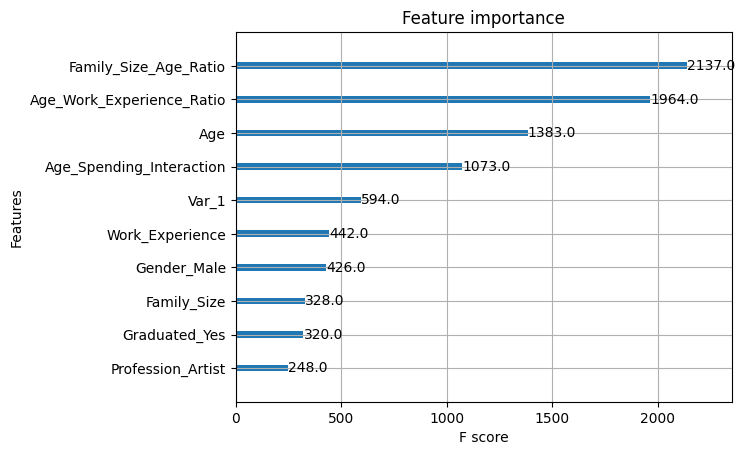

In [ ]:
from xgboost import plot_importance
from xgboost import XGBClassifier

# Inisialisasi Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

xgb_model.fit(X_train, y_train)
plot_importance(xgb_model, max_num_features=10)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

y_pred = xgb_model.predict(X_test)

# Evaluasi performa
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test), multi_class='ovr', average='weighted'))

Akurasi: 0.396875
Precision: 0.3899541653045658
Recall: 0.396875
              precision    recall  f1-score   support

           0       0.34      0.34      0.34        87
           1       0.25      0.21      0.23        67
           2       0.45      0.49      0.47        78
           3       0.49      0.51      0.50        88

    accuracy                           0.40       320
   macro avg       0.38      0.39      0.38       320
weighted avg       0.39      0.40      0.39       320

AUC-ROC Score: 0.6896423724953344


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # Required to use this model
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Parameter Grid
param_grid = {
    'max_iter': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_regularization': [0, 1]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=HistGradientBoostingClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Best Parameters: {'l2_regularization': 0, 'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 50}


In [ ]:
# Evaluasi Matriks
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluasi Performansi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print(classification_report(y_test, y_pred))

# AUC-ROC Score
# HistGradientBoostingClassifier tidak mendukung `predict_proba` untuk multi-class pada versi sebelum 0.24
if hasattr(grid_search.best_estimator_, "predict_proba"):
    auc_roc = roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test), multi_class='ovr', average='weighted')
    print("AUC-ROC Score:", auc_roc)
else:
    print("AUC-ROC Score tidak tersedia untuk model ini.")

Akurasi: 0.459375
Precision: 0.44573442459353546
Recall: 0.459375
F1-Score: 0.4506664078674948
              precision    recall  f1-score   support

           0       0.37      0.39      0.38        87
           1       0.27      0.19      0.23        67
           2       0.53      0.56      0.55        78
           3       0.58      0.64      0.61        88

    accuracy                           0.46       320
   macro avg       0.44      0.45      0.44       320
weighted avg       0.45      0.46      0.45       320

AUC-ROC Score: 0.7403041766769192


In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Pisahkan Fitur dan Target
X = X_train
y = y_train

# Inisialisasi Model dari Best Grid Search
best_model = grid_search.best_estimator_

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Simpan Skor
f1_scores, precision_scores, recall_scores = [], [], []

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    best_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_model.predict(X_test_fold)

    f1_scores.append(f1_score(y_test_fold, y_pred_fold, average='weighted'))
    precision_scores.append(precision_score(y_test_fold, y_pred_fold, average='weighted'))
    recall_scores.append(recall_score(y_test_fold, y_pred_fold, average='weighted'))

# Cetak Hasil Rata-Rata
print("Mean F1-Score:", np.mean(f1_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))

Mean F1-Score: 0.47002211829434304
Mean Precision: 0.4652940906970199
Mean Recall: 0.48044730392156865


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Prediksi
y_pred = lr.predict(X_test)

# Evaluasi performa
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, lr.predict_proba(X_test), multi_class='ovr', average='weighted'))

Akurasi: 0.440625
Precision: 0.4258234988858024
Recall: 0.440625
F1-Score: 0.42862954952834426
              precision    recall  f1-score   support

           0       0.42      0.41      0.42        87
           1       0.27      0.16      0.20        67
           2       0.42      0.54      0.47        78
           3       0.55      0.59      0.57        88

    accuracy                           0.44       320
   macro avg       0.42      0.43      0.42       320
weighted avg       0.43      0.44      0.43       320

AUC-ROC Score: 0.7208651489604697


In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 200, 500],
    'multi_class': ['multinomial', 'ovr']
}

grid_search_lr = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_lr.fit(X_train, y_train)
print("Best Parameters:", grid_search_lr.best_params_)

Best Parameters: {'C': 0.1, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# Inisialisasi Model
best_params = grid_search_lr.best_params_
optimized_model_lr = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    max_iter=best_params['max_iter'],
    multi_class=best_params['multi_class']
)

optimized_model_lr.fit(X_train, y_train)
y_pred = optimized_model_lr.predict(X_test)

# Evaluasi performa
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, optimized_model_lr.predict_proba(X_test), multi_class='ovr', average='weighted'))

Akurasi: 0.465625
Precision: 0.43433028094543114
Recall: 0.465625
              precision    recall  f1-score   support

           0       0.44      0.41      0.43        87
           1       0.25      0.07      0.11        67
           2       0.41      0.62      0.49        78
           3       0.59      0.68      0.63        88

    accuracy                           0.47       320
   macro avg       0.42      0.45      0.42       320
weighted avg       0.43      0.47      0.43       320

AUC-ROC Score: 0.7273678422687389


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# Inisialisasi Model
optimized_model_lr_kfold = optimized_model_lr

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Manual K-Fold
f1_scores, precision_scores, recall_scores = [], [], []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    optimized_model_lr_kfold.fit(X_train, y_train)
    y_pred = optimized_model_lr_kfold.predict(X_test)

    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))

print("Mean F1-Score:", np.mean(f1_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Mean F1-Score: 0.45025390949654637
Mean Precision: 0.4622626401220897
Mean Recall: 0.48751838235294115
